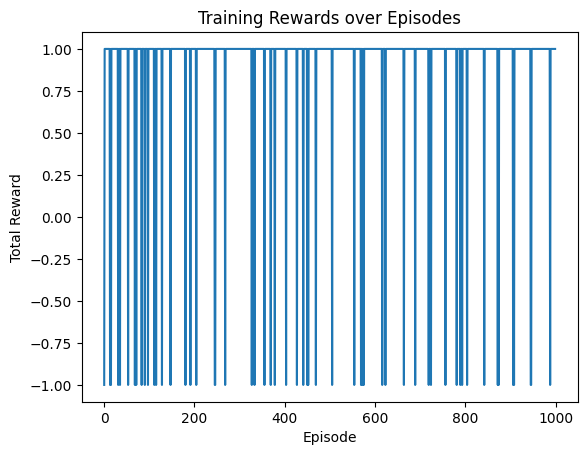

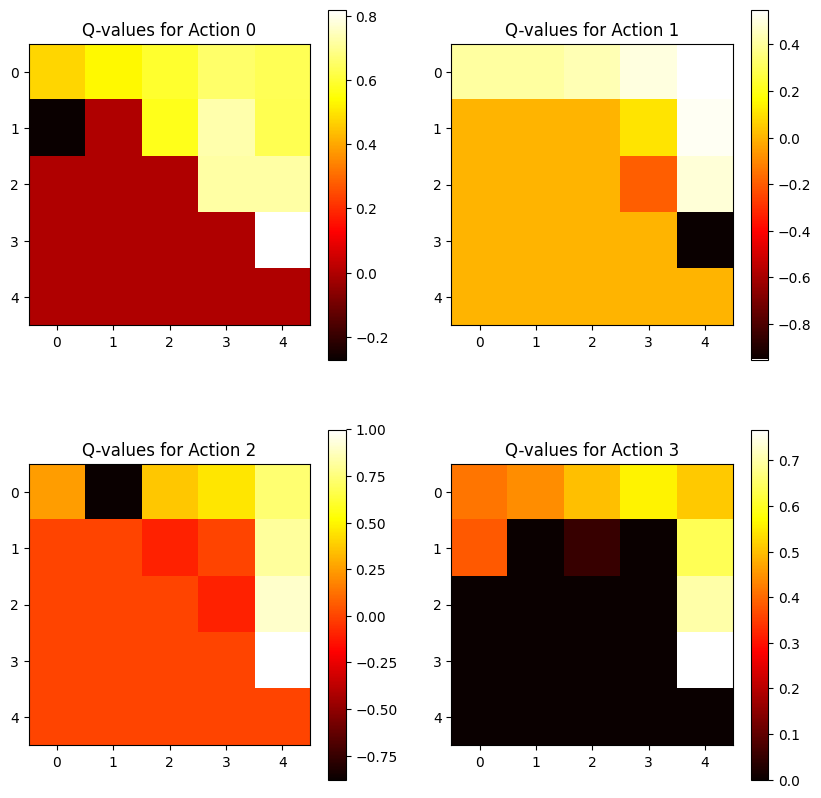

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid world environment
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.grid = np.zeros((size, size))
        self.goal = (size - 1, size - 1)
        self.obstacles = [(1, 1), (2, 2), (3, 3)]
        self.agent = (0, 0)
        self.actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # right, left, down, up
        self.num_actions = len(self.actions)

    def reset(self):
        self.agent = (0, 0)
        return self.agent

    def step(self, action):
        dx, dy = self.actions[action]
        new_x = max(0, min(self.size - 1, self.agent[0] + dx))
        new_y = max(0, min(self.size - 1, self.agent[1] + dy))
        self.agent = (new_x, new_y)
        reward = 0
        done = False
        if self.agent == self.goal:
            reward = 1
            done = True
        elif self.agent in self.obstacles:
            reward = -1
            done = True
        return self.agent, reward, done

# Q-learning agent
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = np.zeros((env.size, env.size, env.num_actions))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.env.num_actions)
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state[0], next_state[1]])
        td_target = reward + self.discount_factor * self.q_table[next_state[0], next_state[1], best_next_action]
        td_error = td_target - self.q_table[state[0], state[1], action]
        self.q_table[state[0], state[1], action] += self.learning_rate * td_error

# Train Q-learning agent
def train_agent(env, agent, num_episodes=1000):
    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        done = False
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.update_q_table(state, action, reward, next_state)
            state = next_state
            episode_reward += reward
        rewards.append(episode_reward)
    return rewards

# Analyze results
def analyze_results(rewards):
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Training Rewards over Episodes')
    plt.show()

    # Visualize Q-values
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(2, 2, i + 1)
        plt.title(f'Q-values for Action {i}')
        plt.imshow(agent.q_table[:, :, i], cmap='hot', interpolation='nearest')
        plt.colorbar()
    plt.show()

# Main
if __name__ == "__main__":
    env = GridWorld()
    agent = QLearningAgent(env)
    rewards = train_agent(env, agent)
    analyze_results(rewards)
